For this project you must create a data set by simulating a real-world phenomenon of
your choosing.
you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

In [1]:
#Requisite libraries and setings for analysis

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import statistics as stat

import seaborn as sns

from fitter import Fitter 


pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Intro 

For this project I will be investigating the relationship that a number of variables have to a penguins weight. This is inspired by the dataset in increasingly greater use in data analytics called the ```palmer penguin``` dataset. This dataset is been touted as a replacement for the Fisher's Iris as a more ethical version to use. [1] Because of Fisher's links to eugenics, some analysts and computer scientists are uncomforable using this set. 

The ```palmer penguins``` are collected and published by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [Allison Horst](https://www.allisonhorst.com). The data in this set is collected from the Palmer Archipelago in Antartica and covers a large number of variables, which we will briefly look at below. The dataset is used under the CC-0 licence. 


[1]: https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/kaob1991/Programming-project/main/penguins_lter.csv")

In [3]:
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10,18.70,181.00,3750.00,MALE,nan,nan,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50,17.40,186.00,3800.00,FEMALE,8.95,-24.69,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,18.00,195.00,3250.00,FEMALE,8.37,-25.33,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,nan,nan,nan,nan,NaN,nan,nan,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,19.30,193.00,3450.00,FEMALE,8.77,-25.32,NaN


To make it easier to compare the variables, especially with correlation later in the project, we are removing some of the variables as these are not pertinent to the investigation. 

In [4]:
penguins = penguins.drop(["Sample Number","Delta 15 N (o/oo)", "Delta 13 C (o/oo)","studyName","Region","Island","Stage","Individual ID","Clutch Completion","Date Egg","Comments"], axis = 1)
penguins

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),39.10,18.70,181.00,3750.00,MALE
1,Adelie Penguin (Pygoscelis adeliae),39.50,17.40,186.00,3800.00,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),40.30,18.00,195.00,3250.00,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),nan,nan,nan,nan,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.70,19.30,193.00,3450.00,FEMALE
...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),nan,nan,nan,nan,NaN
340,Gentoo penguin (Pygoscelis papua),46.80,14.30,215.00,4850.00,FEMALE
341,Gentoo penguin (Pygoscelis papua),50.40,15.70,222.00,5750.00,MALE
342,Gentoo penguin (Pygoscelis papua),45.20,14.80,212.00,5200.00,FEMALE


We can see from that data set that it covers a wide range of variables. There is culmen length, depth, flipper length, and sex; as well as the variable we will be investigating, the Body mass in grams.





In this data set the max weight of a participant is 6300.0 grams, whereas the minimum is 2700.0 grams. This implies a substantial weight difference of almost twice as big. 




In [5]:
weight = penguins["Body Mass (g)"]
min_weight = weight.min()
min_weight

2700.0

In [6]:
max_weight = weight. max()
max_weight

6300.0

One thing that may explain the size differential of the subjects is the species type. There are 3 types of penguin in the current dataset. The Adelie Penguin, the Gentoo penguin, and the Chinstrap penguin. There looks to be more data available for the Adelie and Gentoo Penguin than the Chinstrap in this dataset. Below is a picture detailing the physical appearance of the 3 species.

![Chinstrap Penguin](https://raw.githubusercontent.com/kaob1991/Programming-project/main/pengiuns.jpeg)

In [7]:
penguins["Species"].value_counts()


Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

The other variable that is commonly associated with a weight differential is sex, with the males of most species of animals often weighing more. The scatterplot below would seem to add credence to that theory where the males consistently weigh more than the females. It also would seem that the "Gentoo" species is a overall heavier bird than the Adelie and the Chinstrap penguin. Interestingly, the Chinstrap penguin looks to have a slightly greater variance overall in weight, when accounting for the number of variables in the data. 

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

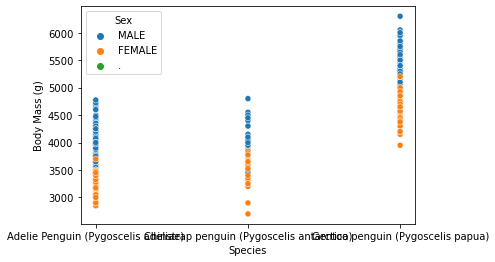

In [8]:
sns.scatterplot(data = penguins, x = "Species",y= "Body Mass (g)", hue = "Sex")

After establishing there is possibly a relationship between the sex of the penguin, and body mass, the next step is to split the dataset into three, based on the species type. This will allow us have a clearer distribution of the data above, and to continue our investigation, and simulation of the data. 

In [9]:
adelie_data = penguins.loc [penguins ["Species"] == "Adelie Penguin (Pygoscelis adeliae)"]
chinstrap_data = penguins.loc [penguins ["Species"] == "Chinstrap penguin (Pygoscelis antarctica)"]
gentoo_data = penguins.loc [penguins ["Species"] == "Gentoo penguin (Pygoscelis papua)"]


## Histograms of body weight
***
The body weights of the birds are drawn below. I've also added a kernel density estimate (KDE) as this will help smooth the data out and provide a clearer view of data trends. 
<br>

There are 3 histograms below relating to the body weight of the 3 birds in the following order:
- Gentoo Penguin
- Adelie Penguin
- Chinstrap penguin

Text(0.5, 1.0, 'Gentoo Body Mass')

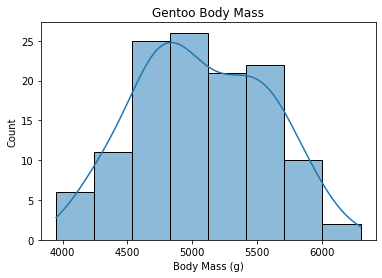

In [37]:
sns.histplot(data = gentoo_data,x = "Body Mass (g)", kde = True)
plt.title("Gentoo Body Mass")

Text(0.5, 1.0, 'Adelie Body Mass')

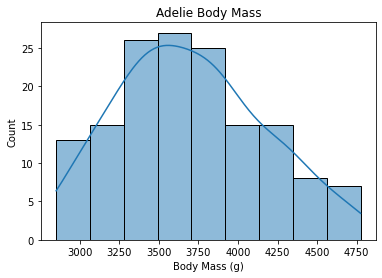

In [38]:
sns.histplot(data = adelie_data,x = "Body Mass (g)", kde = True)
plt.title("Adelie Body Mass")

Text(0.5, 1.0, 'Chinstrap Body Mass')

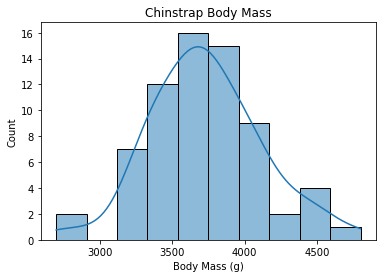

In [39]:
sns.histplot(data = chinstrap_data,x = "Body Mass (g)", kde = True)
plt.title("Chinstrap Body Mass")

Through these plots we can see a clearer indication of the distribution of body weight in the species. All the above have a fairly normal distribution of data; with the Chinstrap bird in particular fitting a Gaussian distribution.

# Examining Relationships

Following the plotting of the body mass of each species, we next want to examine what relationship, if any, that the other variables have with the weight of the bird. There are 3 other variables we are interested in. These are **Flipper length**, **Culmen Length** and **Culmen Depth**. 
These measurements are all in millimeters.

One of the most effective ways to visualise a relationship between 2 variables is to use a scatterplot and below there are a series of 3 plots for each species. Each of these plots looks at the relationship between body mass and one of the 3 variables in bold above. 

The closer the markers on the plot resemble a **/** or **\*** on the data the stronger the relationship. The more scattered the markers, the less likely it is that there is a linear relatinoship between the variables. 

Following each scatterplot, I have also ran ```corr()``` which examines the correlation between the variables on a scale or 0-1 with 0 having no relationship and 1 being a perfect relationship. 

# Chinstrap scatterplots & Correlation Table

Text(0.5, 0.98, 'Examining Relationships between Body Mass and other Variables')

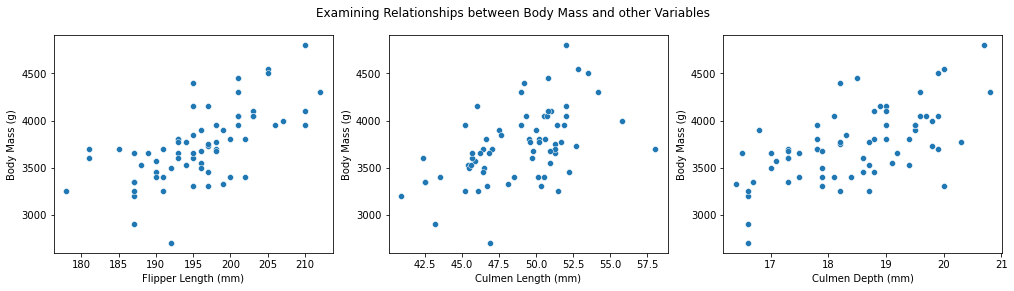

In [40]:
fig, axes  = plt.subplots(1, 3, figsize=(17, 4))
sns.scatterplot(ax = axes[0], data= chinstrap_data, x="Flipper Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax= axes[1],data= chinstrap_data, x="Culmen Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax = axes [2],data= chinstrap_data, x="Culmen Depth (mm)", y="Body Mass (g)")
plt.suptitle("Examining Relationships between Body Mass and other Variables")

In [16]:
chinstrap_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.00,0.65,0.47,0.51
Culmen Depth (mm),0.65,1.00,0.58,0.60
Flipper Length (mm),0.47,0.58,1.00,0.64
Body Mass (g),0.51,0.60,0.64,1.00


Following the running of these 2 functions for the Chinstrap Penguin it can be seen that there is a moderate positive relationship between body mass and Flipper Length, and Culmen depth, but there is a low relationship between the length of the Culmen and the Chinstrap penguins weight. 

# Adelie Scatterplots & Correlation Tables

Text(0.5, 0.98, 'Examining Relationships between Body Mass and other Variables')

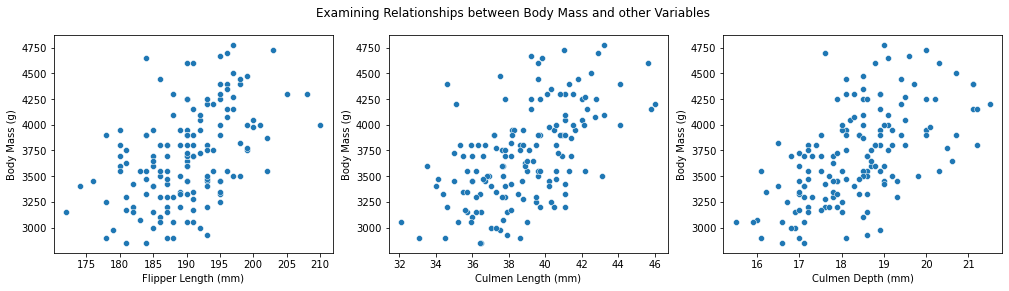

In [42]:
fig, axes  = plt.subplots(1, 3, figsize=(17, 4))
sns.scatterplot(ax = axes[0], data= adelie_data, x="Flipper Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax= axes[1],data= adelie_data, x="Culmen Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax = axes [2],data= adelie_data, x="Culmen Depth (mm)", y="Body Mass (g)")
plt.suptitle("Examining Relationships between Body Mass and other Variables")

In [20]:
adelie_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.00,0.39,0.33,0.55
Culmen Depth (mm),0.39,1.00,0.31,0.58
Flipper Length (mm),0.33,0.31,1.00,0.47
Body Mass (g),0.55,0.58,0.47,1.00


Looking at the data created for the Adelie penguin with the correlation table and the scatterplots there appears to be a low positive relationship with the body weight of the penguin and the 3 other measured variables. From the 3 variables the strongest relationship with the body mass of the Adelie penguin is Culmen Depth, but again is a moderate-poor positive relationship. 

# Gentoo Scatterplots & Correlation Tables 

Text(0.5, 0.98, 'Examining Relationships between Body Mass and other Variables')

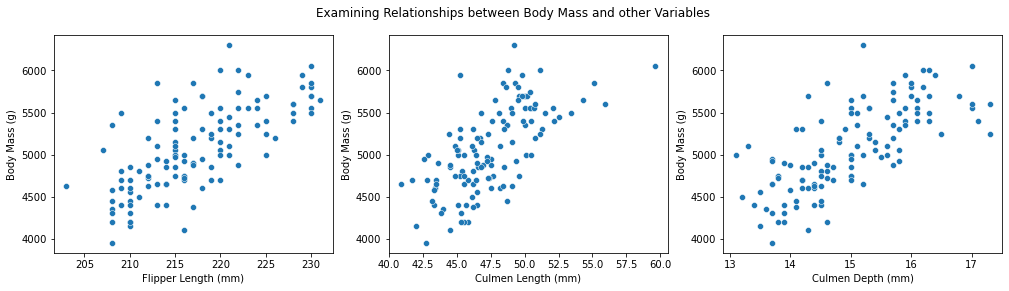

In [41]:
fig, axes  = plt.subplots(1, 3, figsize=(17, 4))
sns.scatterplot(ax = axes[0], data= gentoo_data, x="Flipper Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax= axes[1],data= gentoo_data, x="Culmen Length (mm)", y="Body Mass (g)")
sns.scatterplot(ax = axes [2],data= gentoo_data, x="Culmen Depth (mm)", y="Body Mass (g)")
plt.suptitle("Examining Relationships between Body Mass and other Variables")

In [34]:
gentoo_data.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.00,0.64,0.66,0.67
Culmen Depth (mm),0.64,1.00,0.71,0.72
Flipper Length (mm),0.66,0.71,1.00,0.70
Body Mass (g),0.67,0.72,0.70,1.00


Looking at the data returned in the correlation tables and scatterplots for the Gentoo Penguin; there appears to be a moderate to strong relationship between the body mass of the bird and Culmen depth and Flipper Length. There is also a moderate relationship between the weight of the bird, and the length of the Culmen. 

Having investigated the correlation between body mass and the other 3 variables of each of the species the only one that has a strong relationship is the Gentoo Species. Therefore we will continue our investigations using just this species as the body mass is a good predictor of the other variables. 

Taking a closer look at the Gentoo species and the relationship with the sex of the bird, we can see on average the body mass for the male is 5484.84 grams and the female is 4679.74 grams.

In [ ]:
gentoo_female = gentoo_data.loc [gentoo_data ["Sex"] == "FEMALE"]
gentoo_male = gentoo_data.loc [gentoo_data ["Sex"] == "MALE"]

In [ ]:
gentoo_female.describe()

In [ ]:
gentoo_male.describe()

# Graphical display

## Histogram of Gentoo Penguins 

Below are 4 histograms, these show the distribution in size of the 4 variables in the dataset. It can be seen that culmen length is significantly shorter in the females than the males with the mean around the 45mm mark in females in comparison to the male at around the 49mm mark. Equally, the Flipper length and Culmen Depth  is greater in males then females

In [ ]:
fig, axes  = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0],data= gentoo_data, x = "Body Mass (g)", hue = "Sex", bins = 15, kde = True)
sns.histplot(ax=axes[0, 1],data= gentoo_data, x = "Flipper Length (mm)", hue = "Sex", bins = 15, kde = True)
sns.histplot(ax=axes[1, 0],data= gentoo_data, x = "Culmen Length (mm)", hue = "Sex", bins = 15, kde = True)
sns.histplot(ax=axes[1, 1],data= gentoo_data, x = "Culmen Depth (mm)", hue = "Sex", bins = 15, kde = True)


## Graphical data by sex 

### Females


In [ ]:
fig, axes  = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0],data= gentoo_female, x = "Body Mass (g)", bins = 15, kde = True)
sns.histplot(ax=axes[0, 1],data= gentoo_female, x = "Flipper Length (mm)", bins = 15, kde = True)
sns.histplot(ax=axes[1, 0],data= gentoo_female, x = "Culmen Length (mm)", bins = 15, kde = True)
sns.histplot(ax=axes[1, 1],data= gentoo_female, x = "Culmen Depth (mm)", bins = 15, kde = True)


## Interpreting the data 

From the histogram above we can draw a number of conclusions about the distribution of the variables. 

In the case of the **Body Mass** we can see that the data has a fairly standard normal distribution, with a slight negative (left) skewness to it. 

With the data for **flipper length** conversely, while this also has a normal standard distribution, there is a skewness to the right (positive).

**Culmen length** has a relatively normal distribution to it also. 

Finally **Culmen Depth** is a normal distribution, with greater degrees of freedom than the others. 


In [ ]:
fig, axes  = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0],data= gentoo_male, x = "Body Mass (g)", bins = 15, kde= True)
sns.histplot(ax=axes[0, 1],data= gentoo_male, x = "Flipper Length (mm)", bins = 15, kde= True)
sns.histplot(ax=axes[1, 0],data= gentoo_male, x = "Culmen Length (mm)", bins = 15, kde = True)
sns.histplot(ax=axes[1, 1],data= gentoo_male, x = "Culmen Depth (mm)", bins = 15, kde = True)

## Synthesising data 

Following our investigation of the data in the original dataset we can then begin to synthesise data based on this. There are a number of ways to create data. Firstly we could use ```numpy.random``` to create a dataset but the main draw back of using this is that it requires a lot more work to get the data in one column to correlate to the other data in the other columns. For this reason it was decided that the original dataset could be used with ```scikit.learn``` to use Machine learning to aid in the development of the synthesised data.  

# REFERENCES

- https://towardsdatascience.com/data-analysis-in-python-getting-started-with-pandas-8cbcc1500c83

- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

- https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-scatterplot-169358

- https://statisticsbyjim.com/basics/correlations/